In [4]:
import numpy as np
import cv2
import pickle
from PIL import Image

In [5]:
def _direct_render(patchedGPS, length=1024):
    """直接渲染GPS点"""
    gps = np.zeros((length, length, 1), np.uint8)
    ratio = length / 1024.
    patchedGPS = patchedGPS[(0 <= patchedGPS['lat']) & (patchedGPS['lat'] < 1024) &
                            (0 <= patchedGPS['lon']) & (patchedGPS['lon'] < 1024)]
    y = np.array(patchedGPS['lon'] * ratio, np.int_)
    x = np.array(patchedGPS['lat'] * ratio, np.int_)

    gps[x, y] = 255

    gps = cv2.dilate(gps, np.ones((3, 3))) # 膨胀
    gps = gps[..., None] # 增加一个维度
    return gps


In [6]:
def _linear_render(patchedGPS, length=1024):
    """线性渲染出GPS点的数量信息"""
    ratio = length / 1024.
    patchedGPS = patchedGPS[(0 <= patchedGPS['lat']) & (patchedGPS['lat'] < 1024) &
                            (0 <= patchedGPS['lon']) & (patchedGPS['lon'] < 1024)]
    y = np.array(patchedGPS['lon'] * ratio, np.int_)
    x = np.array(patchedGPS['lat'] * ratio, np.int_)

    #统计每个像素点上的GPS数量
    gps_counts = np.bincount(x * length + y, minlength=length*length)

    # 根据GPS数量设置像素的亮度
    max_count = np.max(gps_counts)
    gps = (gps_counts * 255 / max_count).reshape((length, length)).astype(np.uint8)

    gps = cv2.dilate(gps, np.ones((3, 3))) # 膨胀
    gps = gps[..., None] # 增加一个维度
    return gps

In [7]:
def _log_render(patchedGPS, length=1024):
    """取log渲染出GPS点的数量信息"""
    ratio = length / 1024.
    patchedGPS = patchedGPS[(0 <= patchedGPS['lat']) & (patchedGPS['lat'] < 1024) &
                            (0 <= patchedGPS['lon']) & (patchedGPS['lon'] < 1024)]
    y = np.array(patchedGPS['lon'] * ratio, np.int_)
    x = np.array(patchedGPS['lat'] * ratio, np.int_)

    #统计每个像素点上的GPS数量
    gps_counts = np.bincount(x * length + y, minlength=length*length)

    # 根据GPS数量设置像素的亮度
    max_count = np.max(gps_counts)
    print("单个像素点上最大GPS数量：", max_count)
    #加1是为了防止出现log(0)的情况
    gps = (np.log(gps_counts + 1) / np.log(max_count + 1) * 255).reshape((length, length)).astype(np.uint8)

    gps = cv2.dilate(gps, np.ones((3, 3))) # 膨胀
    gps = gps[..., None] # 增加一个维度
    return gps

In [ ]:
#加窗函数
#一个去掉低频噪声和高频噪声的矩形窗
import cv2
import numpy as np
from PIL import Image

# 读取图像
image = cv2.imread('../Datasets/dataset_mask7/GPS/taxi_direct_patch/2_3_gps.png')  # 替换成你的图像文件路径

# 定义窗口的参数
window_center = 128  # 窗口中心灰度值
window_width = 200   # 窗口宽度

# 计算窗口的上下限
window_min = window_center - window_width // 2
window_max = window_center + window_width // 2

# 使用NumPy进行加窗处理
windowed_image = np.copy(image)  # 复制图像以保留原始图像
windowed_image = np.clip((windowed_image - window_min) / (window_max - window_min), 0, 1)  # 进行加窗处理

# 将浮点数值映射回8位无符号整数范围（0-255）
windowed_image = (windowed_image * 255).astype(np.uint8)

# 显示原始图像和加窗后的图像
# cv2.imshow('Original Image', image)

image = Image.fromarray(windowed_image.squeeze())
image.show()



: 

单个像素点上最大GPS数量： 1897
(1024, 1024, 1)


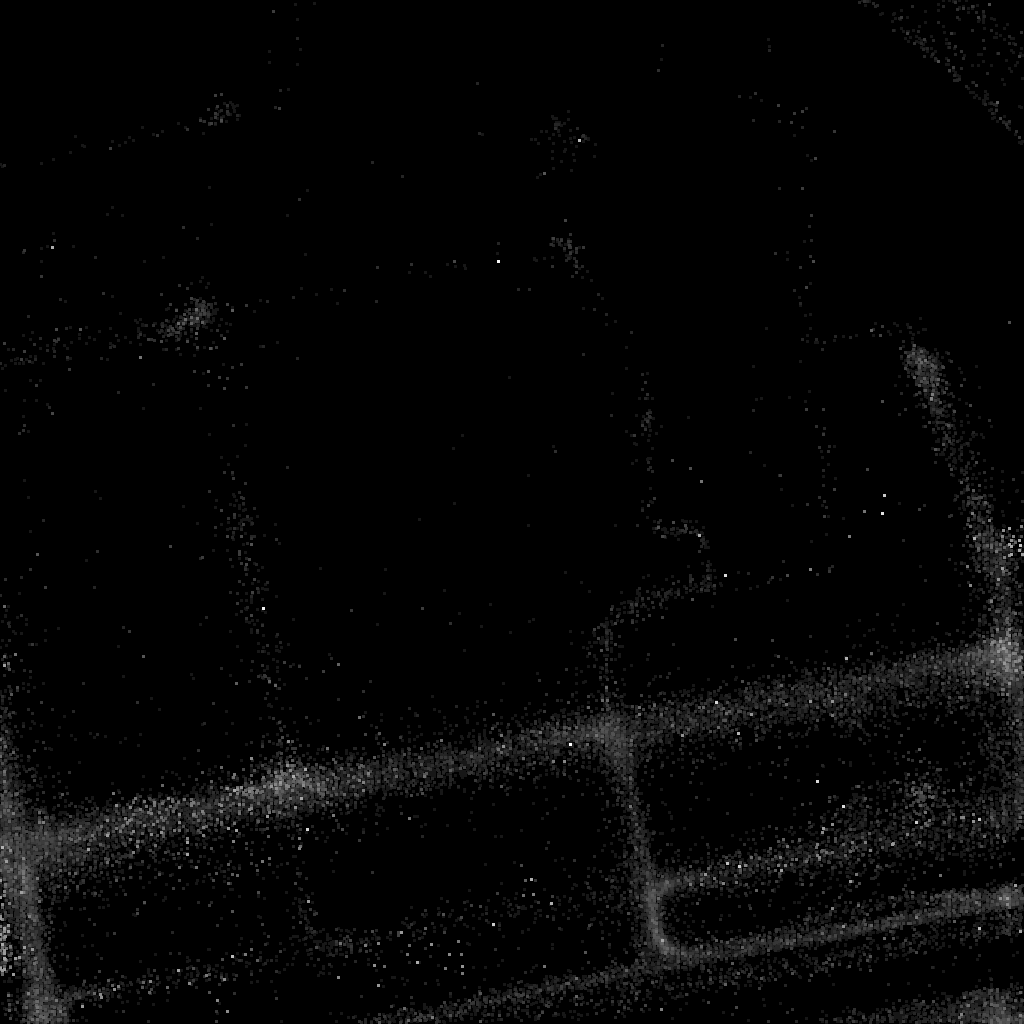

In [10]:
#测试代码
with open("../Datasets/dataset_mask7/GPS/taxi/2_3_gps.pkl", 'rb') as f:
    patchedGPS = pickle.load(f)
# gps = _direct_render(patchedGPS)
# gps = _linear_render(patchedGPS)
gps = _log_render(patchedGPS)
print(gps.shape)
image = Image.fromarray(gps.squeeze())
image.show()

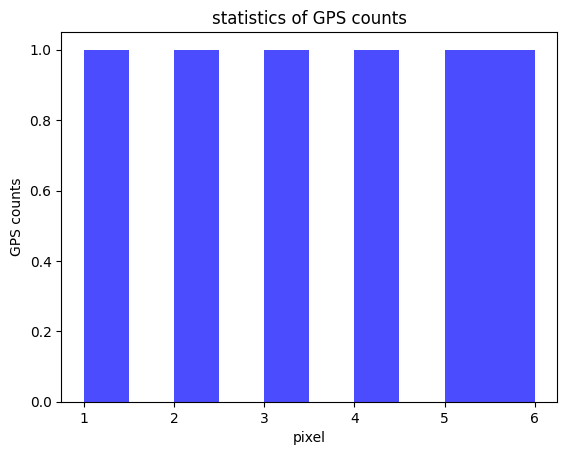

In [14]:
import matplotlib.pyplot as plt
data = [1, 2, 3, 4, 5, 6]  # 这里的data是你的数据数组
plt.hist(data, bins=10, color='blue', alpha=0.7)
plt.xlabel('pixel')
plt.ylabel('GPS counts')
plt.title('statistics of GPS counts')

plt.show()

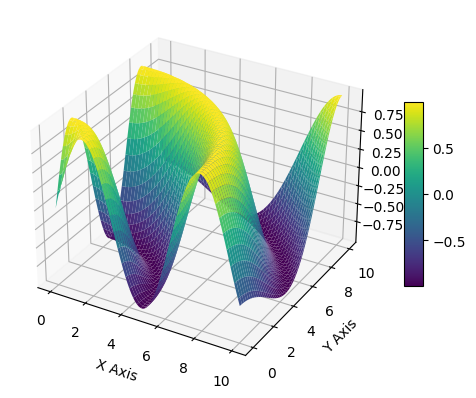

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Generate sample data (replace this with your own data)
x = np.linspace(0, 10, 100)
y = np.linspace(0, 10, 100)
x, y = np.meshgrid(x, y)
z = np.sin(np.sqrt(x**2 + y**2))

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
surface = ax.plot_surface(x, y, z, cmap='viridis')

# Add color bar
fig.colorbar(surface, ax=ax, shrink=0.5, aspect=10)

# Set axis labels
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')

# Show the plot
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 创建一个示例的一维数组
data = np.array([2, 3, 1, 4, 6, 2, 1, 4, 3, 5])

# 使用range函数创建与数组长度相同的索引数组
indices = np.arange(len(data))

# 绘制直方图
plt.bar(indices, data)

# 添加标签和标题
plt.xlabel('索引')
plt.ylabel('数据值')
plt.title('一维数组的直方图')

# 显示图形
plt.show()


In [ ]:
#一个去掉高频噪声和低频噪声的矩形窗
import cv2
import numpy as np

# 读取图像
image = cv2.imread('your_image.jpg')  # 替换成你的图像文件路径

# 定义窗口的参数
window_center = 128  # 窗口中心灰度值
window_width = 256   # 窗口宽度

# 计算窗口的上下限
window_min = window_center - window_width // 2
window_max = window_center + window_width // 2

# 使用NumPy进行加窗处理
windowed_image = np.copy(image)  # 复制图像以保留原始图像
windowed_image = np.clip(windowed_image, window_min, window_max)  # 进行加窗处理

# 将浮点数值映射回8位无符号整数范围（0-255）
windowed_image = (windowed_image * 255).astype(np.uint8)

# 显示原始图像和加窗后的图像
cv2.imshow('Original Image', image)
cv2.imshow('Windowed Image', windowed_image)

# 等待用户按下任意键，然后关闭窗口
cv2.waitKey(0)
cv2.destroyAllWindows()


In [ ]:
#一个高斯窗
import cv2
import numpy as np

# 读取图像
image = cv2.imread('your_image.jpg')  # 替换成你的图像文件路径

# 定义窗口的参数
window_center = 128  # 窗口中心灰度值
window_width = 256   # 窗口宽度

# 计算窗口的上下限
window_min = window_center - window_width // 2
window_max = window_center + window_width // 2

# 使用NumPy进行加窗处理
windowed_image = np.copy(image)  # 复制图像以保留原始图像
windowed_image = np.clip((windowed_image - window_min) / (window_max - window_min), 0, 1)  # 进行加窗处理
windowed_image = windowed_image ** 0.5  # 使用幂函数对图像进行平滑处理

# 将浮点数值映射回8位无符号整数范围（0-255）
windowed_image = (windowed_image * 255).astype(np.uint8)

# 显示原始图像和加窗后的图像
cv2.imshow('Original Image', image)
cv2.imshow('Windowed Image', windowed_image)

# 等待用户按下任意键，然后关闭窗口
cv2.waitKey(0)
cv2.destroyAllWindows()


In [ ]:
#一个汉宁窗
import cv2
import numpy as np

# 读取图像
image = cv2.imread('your_image.jpg')  # 替换成你的图像文件路径

# 定义窗口的参数
window_center = 128  # 窗口中心灰度值
window_width = 256   # 窗口宽度

# 计算窗口的上下限
window_min = window_center - window_width // 2
window_max = window_center + window_width // 2

# 使用NumPy进行加窗处理
windowed_image = np.copy(image)  # 复制图像以保留原始图像
windowed_image = np.clip((windowed_image - window_min) / (window_max - window_min), 0, 1)  # 进行加窗处理
windowed_image = 0.5 + 0.5 * np.cos(np.pi * windowed_image)  # 使用余弦函数对图像进行平滑处理

# 将浮点数值映射回8位无符号整数范围（0-255）
windowed_image = (windowed_image * 255).astype(np.uint8)

# 显示原始图像和加窗后的图像
cv2.imshow('Original Image', image)
cv2.imshow('Windowed Image', windowed_image)

# 等待用户按下任意键，然后关闭窗口
cv2.waitKey(0)
cv2.destroyAllWindows()

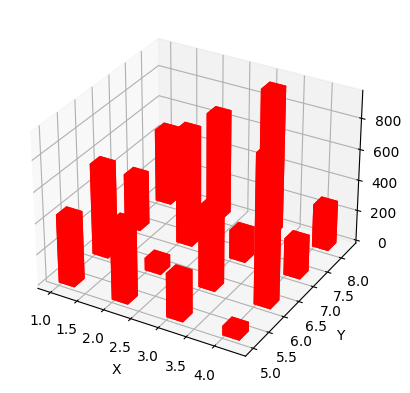

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
 
# 绘图设置
fig = plt.figure() # 新建画布
# ax = fig.gca(projection='3d')  # 三维坐标轴
ax = fig.add_subplot(111, projection='3d') #111表示在画布上的位置，也就是第一幅图
# X和Y的个数要相同
X = [1,2,3,4]
Y = [5,6,7,8]
Z = np.random.randint(0, 1000, 16) # 生成16个随机整数
# meshgrid把X和Y变成平方长度，比如原来都是4，经过meshgrid和ravel之后，长度都变成了16，因为网格点是16个
xx, yy = np.meshgrid(X, Y)  # 网格化坐标
X, Y = xx.ravel(), yy.ravel()  # 矩阵扁平化
# 设置柱子属性
height = np.zeros_like(Z) # 新建全0数组，shape和Z相同，据说是图中底部的位置
width = depth = 0.3 # 柱子的长和宽
# 颜色数组，长度和Z一致
c = ['r']*len(Z)
# 开始画图，注意本来的顺序是X, Y, Z, width, depth, height，但是那样会导致不能形成柱子，只有柱子顶端薄片，所以Z和height要互换
ax.bar3d(X, Y, height, width, depth, Z,  color=c, shade=False)  # width, depth, height
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

8 [0 0 0 ... 0 0 2]
(1024, 1024, 1)


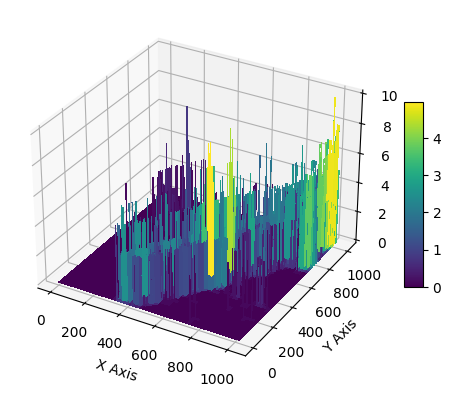

In [3]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import numpy as np
import cv2
import pickle
import sys
sys.path.append("../") #当前目录上层目录中的包也可以被找到了


def to_histogram(image):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Create a figure
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Get the image dimensions
    height, width, _ = image.shape

    # Create X and Y coordinate grids based on the image dimensions
    X, Y = np.meshgrid(np.arange(0, width), np.arange(0, height))

    # Flatten the image and coordinate grids
    image_data = image.ravel()
    X_data = X.ravel()
    Y_data = Y.ravel()

    # Create a 3D histogram
    hist, xedges, yedges = np.histogram2d(X_data, Y_data, bins=(width, height), weights=image_data)

    # Create a meshgrid for the X and Y coordinates
    X, Y = np.meshgrid(xedges, yedges)

    # Plot the 3D histogram
    ax.plot_surface(X, Y, hist.T, cmap='viridis')

    # Customize labels if needed
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.set_zlabel('Frequency')

    plt.show()
    


def _sparse_to_dense(patchedGPS, length=1024):
        """渲染出GPS点的数量信息"""
        ratio = length / 1024.
        patchedGPS = patchedGPS[(0 <= patchedGPS['lat']) & (patchedGPS['lat'] < 1024) &
                                (0 <= patchedGPS['lon']) & (patchedGPS['lon'] < 1024)]
        y = np.array(patchedGPS['lon'] * ratio, np.int_)
        x = np.array(patchedGPS['lat'] * ratio, np.int_)

        #统计每个像素点上的GPS数量
        gps_counts = np.bincount(x * length + y, minlength=length*length)
    
        # 根据GPS数量设置像素的亮度
        max_count = np.max(gps_counts)
        print(max_count, gps_counts)
        #加1是为了防止出现log(0)的情况
        gps = (np.log(gps_counts + 1) / np.log(max_count + 1) * 255).reshape((length, length)).astype(np.uint8)

        gps = cv2.dilate(gps, np.ones((3, 3))) # 膨胀
        gps = gps[..., None] # 增加一个维度
        return gps


import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from PIL import Image

def image_to_heatmap(img, elevation_scale=10):
    # Load the image and convert it to grayscale
    # img = Image.open(image_path).convert('L')
    img_array = np.array(img)

    # Create X, Y grid based on image dimensions
    x = np.arange(0, img_array.shape[1], 1)
    y = np.arange(0, img_array.shape[0], 1)
    x, y = np.meshgrid(x, y)

    # Normalize pixel values to range [0, 1]
    z = img_array / 255.0

    # Scale the elevation for better visualization
    z *= elevation_scale

    # Create a 3D plot
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Plot the surface
    surface = ax.plot_surface(x, y, z, cmap=cm.viridis, linewidth=0, antialiased=False)

    # Add color bar
    fig.colorbar(surface, ax=ax, shrink=0.5, aspect=10)

    # Set axis labels
    ax.set_xlabel('X Axis')
    ax.set_ylabel('Y Axis')
    ax.set_zlabel('Elevation')

    # Show the plot
    # plt.show()


# Replace 'your_image_path.png' with the path to your black and white image

if __name__ == "__main__":
    with open("../Datasets/dataset_time/GPS/patch/0_9_gps.pkl", 'rb') as f:
            patchedGPS = pickle.load(f)
            # if "precision" in self.aug_mode:
            #     scaled_length = int(self.length * np.random.uniform(0.1, 1.0, None))
            # else:
            #     scaled_length = 1024
            scaled_length = 1024
            gps = _sparse_to_dense(patchedGPS, length=scaled_length)
            print(gps.shape)
            image_to_heatmap(gps.squeeze())

            # to_histogram(gps) # 画出直方图
            # cv2.imwrite("save_images/test3.png", gps)

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (1025, 1025) and arg 2 with shape (1024, 1024).

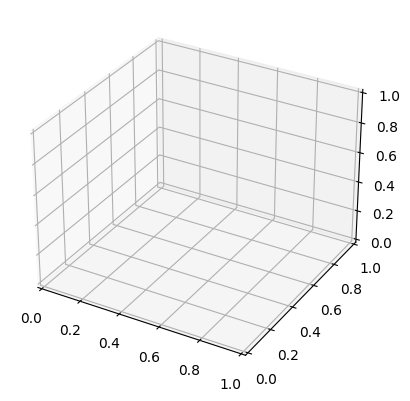

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Load your grayscale image (you should replace 'your_image.png' with your image file)
image = plt.imread('save_images/test1.png')

# Create a figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Get the image dimensions
height, width = image.shape

# Create X and Y coordinate grids based on the image dimensions
X, Y = np.meshgrid(np.arange(0, width), np.arange(0, height))

# Flatten the image and coordinate grids
image_data = image.ravel()
X_data = X.ravel()
Y_data = Y.ravel()

# Create a 3D histogram
hist, xedges, yedges = np.histogram2d(X_data, Y_data, bins=(width, height), weights=image_data)

# Create a meshgrid for the X and Y coordinates
X, Y = np.meshgrid(xedges, yedges)

# Plot the 3D histogram
ax.plot_surface(X, Y, hist.T, cmap='viridis')

# Customize labels if needed
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Frequency')

plt.show()
